# Regresson

### Some background: 

Linear regression is a statistical technique that is classified as a supervised learning method that can be used to predict a variable based on one or several variables, the predicted variable is called the dependent variable and the other variable/variables that are used to predict are called independent variables. this technique is applicable when we are trying to predict a continuous and quantile variable.
___
This notebook is divided into two main parts:
 - Simple linear regression
 - Polynomial regression

In each part, I'll implement a from-scratch version and a sklearn-implemented version of both linear and polynomial regression. then I would compare the results of both versions (by results, I mean the value of the final cost estimated on test data).


### Project overview:
In this project, we have one dependent, and one independent variable, the objective is to find the best line to present the relationship between those variables. In the first part, we are trying to estimate this relationship in the form of a straight line, while in the second part, by adding a new feature, we are trying to estimate the relationship in the form of a curved line.
This project is only aimed at educational purposes, so the problem that we are trying to solve is not a real-world problem.

In first cell of code, we are importing required libraries, then in last line, we are setting our plotting style to `ggplot` plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.style.use('ggplot')                         

### Dataset
The dataset we are using is named "fish market" and it's content is as follows:
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

This dataset is available at the following link: 
https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [2]:
data = pd.read_csv('../datasets/Fish.csv')

print(data.columns)
print('\n\n')
print(data.head())

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')



  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


By using the `pariplot` method from the `seaborn` module, we can explore and visualize the existing relationships between every two columns of our dataset.

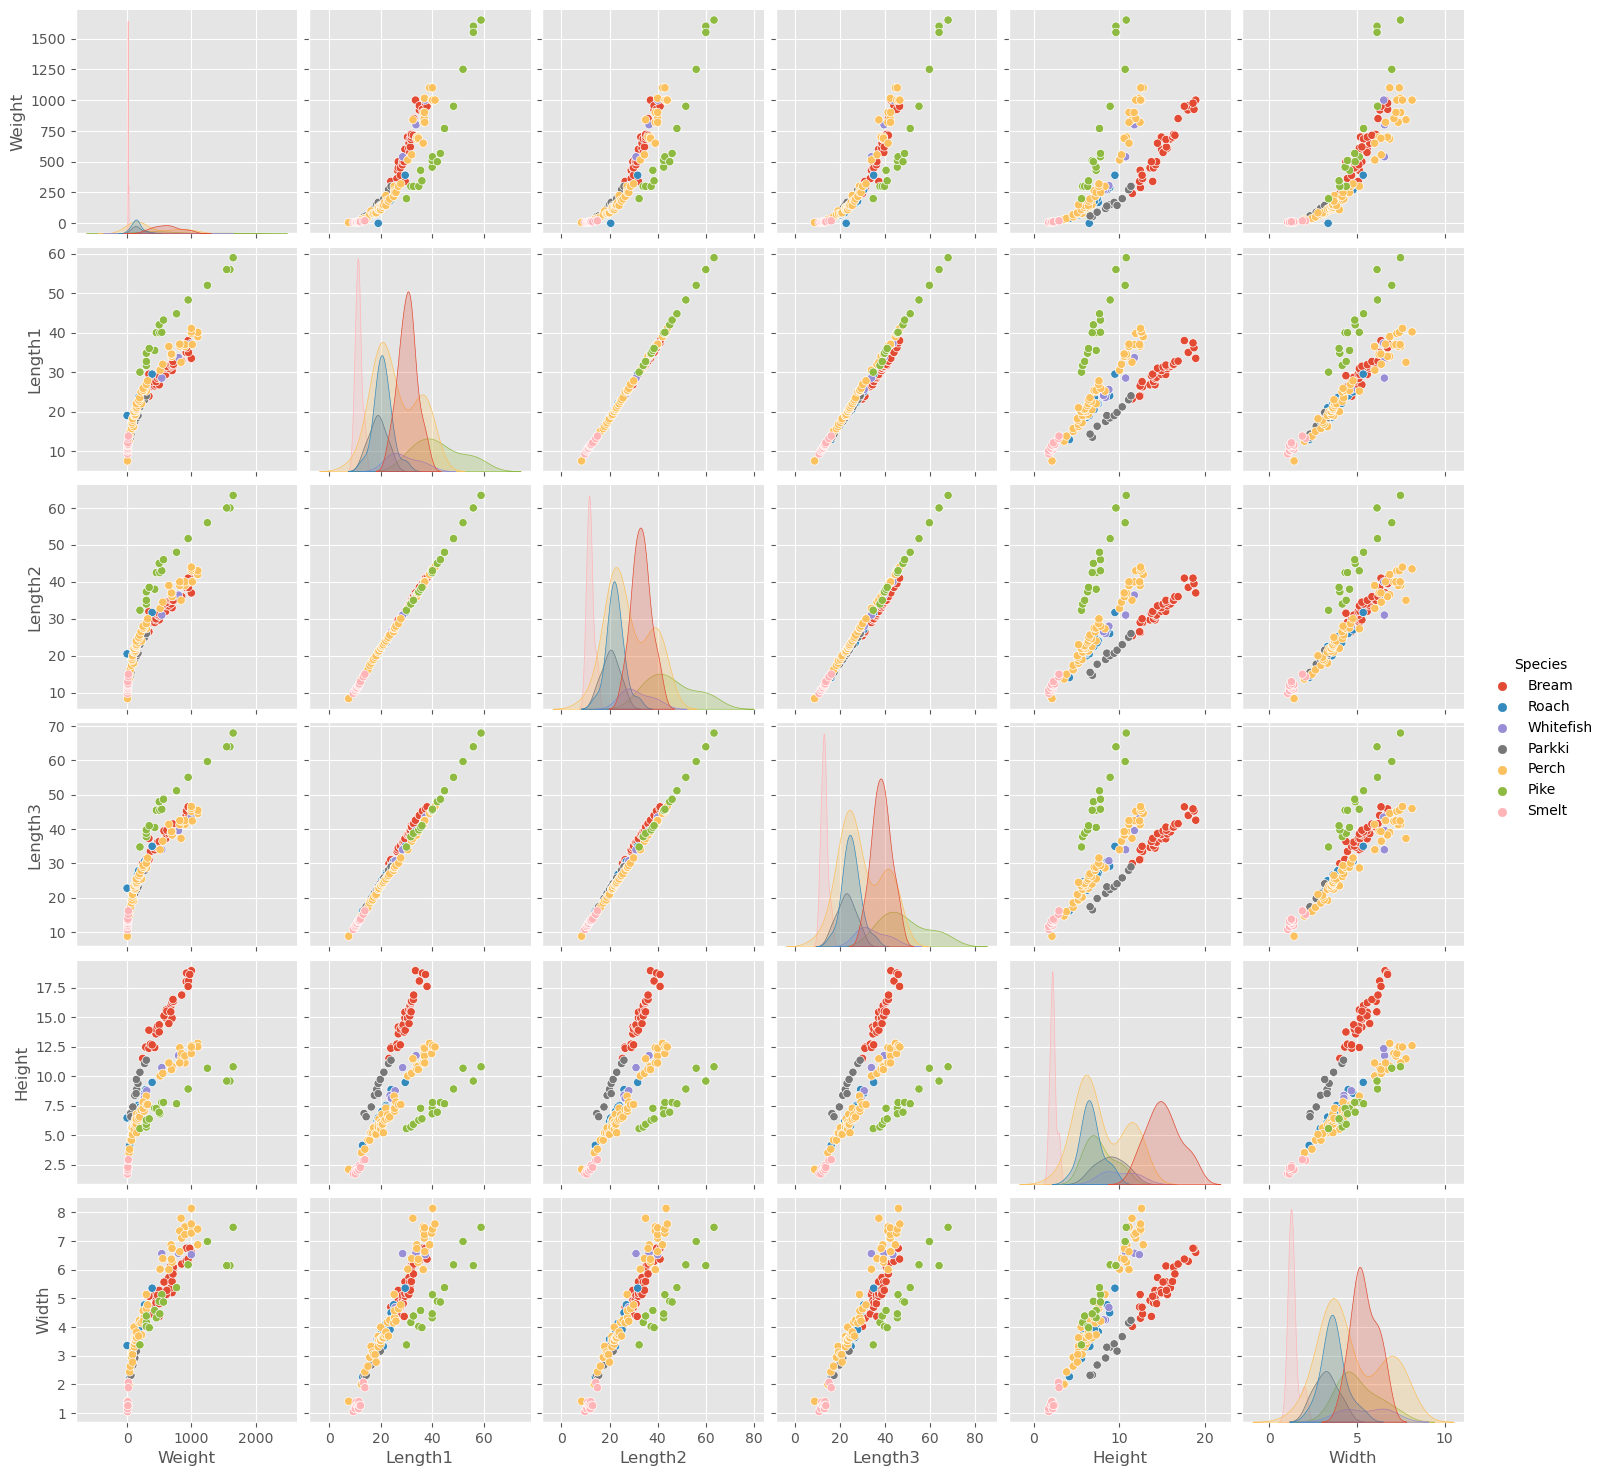

In [3]:
sns.pairplot(data, hue='Species')

As shown above, the relationship between `Width` and `Weight` columns is a candidate for our linear regression model. So we choose `Width` column as the independent variable (or X) and `Weight` column as the dependent variable (or y).

After creating our data, it's time to split the data into training and testing sets, and this job can be done by using the `train_test_split`
function.

In [4]:
Xs = data.Width
ys = data.Weight

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=3)

By using `matplotlib` library, we are going to plot both training and testing datasets.

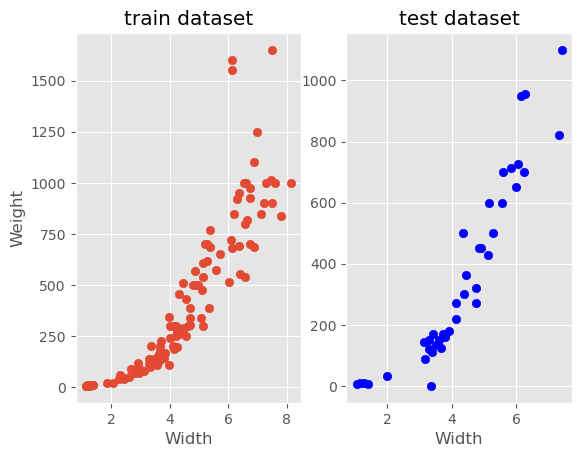

In [5]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.title('train dataset')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue')
plt.title('test dataset')
plt.xlabel('Width')
plt.show()

---
---
## First phase:
---
---

In the following cell, there is a class called linear_regressor which provides us the "from-scratch" version of the simple linear regression model.

### Hypothesis representation
If we consider the relationship between the `Width` and `Weight` as a straight line, the hypothesis is the function that represents the equation of the line. $$ h_\theta = \theta_0 + \theta_1x_i \qquad i = 1,2,...,m \qquad \text{m is the number of samples}$$

This example is a simple/univariate linear regression, therefore we can consider $\theta_0$ as y-intercept, and $\theta_1$ as the slope of the line.
At the time of instantiation, two random values are assigned to the $\theta_0$ and $\theta_1$.



### Cost function
For evaluating our model performance, we need to define a cost function, which it's value expresses how bad our model is predicting the target/dependent variable. there are different cost functions for linear regression, in this implementation, we are using **mean squared error** as our cost function. this function calculates the cost as follows: $$ J(\theta)=\dfrac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)^2 $$

**Note**: here we multiplied the **mean squared error** function by $\dfrac{1}{2}$ in order to simplify the derivative of the cost fucntion.

the cost_fucntion method is implemented in a way that supports both cases of giving a single training example, or multiple training examples, as input.



### Update method
In the update method, gradient descent is used to update the $\theta_0$ and $\theta_1$ parameters of the linear regression model. there are two parameters in this case, so we need to calculate the derivative of the cost function, relative to both $\theta_0$ and $\theta_1$ parameters.
$$\dfrac{∂}{∂\theta_0}J(\theta_0, \theta_1)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})$$
$$\dfrac{∂}{∂\theta_1}J(\theta_0, \theta_1)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}).x^{(i)}$$

then, the calculated gradients are multiplied by $\alpha$ (alpha) and then subtracted by the previous value of $\theta_0$ and $\theta_1$, the resulting value will assign to the $\theta_0$ and $\theta_1$ parameters. 

**Note**: here we are using full batch gradient descent, which that means in each update, we are using the whole dataset to estimate how badly our model is performing.

In [6]:
class linear_regressor : 
    def __init__(self, alpha):
        self.theta0, self.theta1 = self.initializer()
        self.alpha = alpha
        
    def hypothesis(self, x):
        y = self.theta0 + (self.theta1 * x)
        return y
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(2)
    
    def cost_function(self, x, y):
        if type(x) == float :
            return (1/(2*len(x))) * (self.hypothesis(x) - y)**2
        else :
            return (1/(2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
    
    def update(self, x, y):
        if type(x) == float :
            delta_theta0 = self.hypothesis(x) - y
            delta_theta1 = (self.hypothesis(x) - y) * x
        else :
            delta_theta0 = (self.hypothesis(x) - y).sum() * 1/len(x)
            delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * 1/len(x)
            
        self.theta0 = (self.theta0 - (self.alpha * delta_theta0))
        self.theta1 = (self.theta1 - (self.alpha * delta_theta1))

The range of values of our two variables is so different in this case, so in order to address this problem, we are going to **normalize** these two varibals. we are doing this task by using `StandardScalar` calss of `preprocessing` submodule of `sklearn` module.

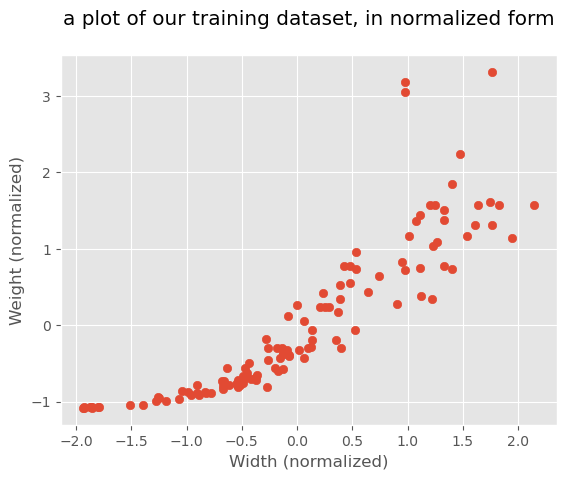

In [7]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)
plt.scatter(X_train_scaled, y_train_scaled)
plt.title('a plot of our training dataset, in normalized form\n')
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.show()

Then, the training phase will begin, first of all, we will instantiate a new instance of the `linear_regressor` class defined before, with a specific value for the alpha parameter. in the next step to make an animation of the training procedure, we defined an `animate` function that acts as a frame creator for our animation, in each execution of this function, we are calculating the value of the loss function on both train and test datasets, then plotting the dataset and the fitting line using the `matplotlib`, and finally, update the instance of `linear_regressor` class using `update` method.   

In [98]:
ln_reg = linear_regressor(0.08)
fig, ax = plt.subplots()
loss_on_train = []
loss_on_test = []

def animate(i) :
    loss_on_train.append(ln_reg.cost_function(X_train_scaled, y_train_scaled))
    loss_on_test.append(ln_reg.cost_function(X_test_scaled, y_test_scaled))
    ax.cla()
    ax.set_title('fitting on training dataset\n')
    ax.set_xlabel('Width (normalized)')
    ax.set_ylabel('Weight (normalized)')
    ax.scatter(X_train_scaled, y_train_scaled, alpha=0.7, s=50, label='training points')
    ax.scatter(X_train_scaled, ln_reg.hypothesis(X_train_scaled), color='darkgreen', alpha=0.7, s=20, label='predicted training points')
    ax.plot(X_train_scaled, ln_reg.hypothesis(X_train_scaled), alpha=0.7, color='darkgreen', label='fitting line')
    ax.legend()
    ln_reg.update(X_train_scaled, y_train_scaled)

ani = FuncAnimation(fig, animate, frames=40, interval=300)

plt.close()

In [99]:
HTML(ani.to_html5_video())

In the next plot, we are plotting the corresponding **predicted** datapoints for the test dataset datapoints.

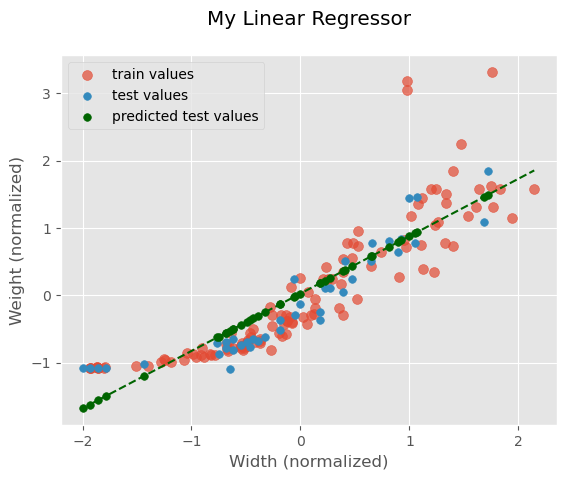

In [88]:
plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=1, s=30)
plt.scatter(X_test_scaled, ln_reg.hypothesis(X_test_scaled), color='darkgreen', label='predicted test values', s=30)
plt.plot([X_train_scaled.min(), X_train_scaled.max()], [ln_reg.hypothesis(X_train_scaled.min()), ln_reg.hypothesis(X_train_scaled.max())], linestyle='--', color='darkgreen' )
plt.legend()
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('My Linear Regressor\n')
plt.show()

The next plot will show the behavior of the cost function on both training and testing datasets, during the training phase.

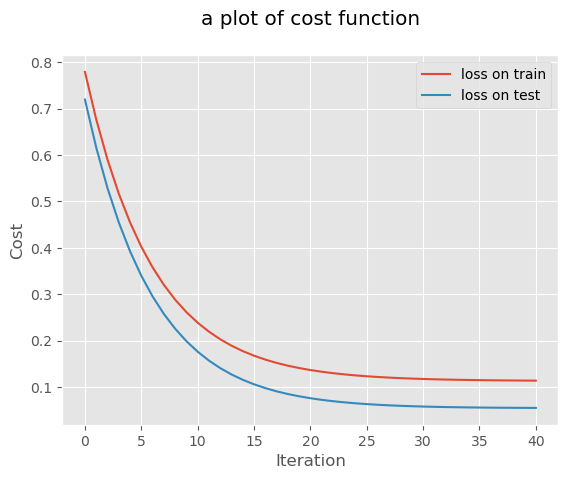

In [11]:
plt.plot(list(range(len(loss_on_train))), loss_on_train, label='loss on train')
plt.plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
plt.legend()
plt.title('a plot of cost function\n')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In the following, we are going to create a 3D plot of the cost function on the values of `Tetha0` and `Tetha1` parameters. to fulfill this purpose, in the following cell, we will first create the three needed grids for the plot. two of the grids will represent the values of `Tetha0` and `Tetha1` and the third grid will represent the values of the cost function corresponding to each combination of `Tetha0` and `Tetha1` values.

In [36]:
def f(x, y, t0, t1):
    res = np.zeros_like(t0)
    for i in range(len(x)):
        h = x[i][0] * t1 + t0
        res = res + (1/2 * (h - y[i])**2)
    res = res / len(x)
    return res

theta0_axis = np.linspace(-1.5, 1.5, 100)
theta1_axis = np.linspace(-1.5, 2.5, 100)

Tetha0_axis, Tetha1_axis = np.meshgrid(theta0_axis, theta1_axis)

cost_func = f(X_train_scaled, y_train_scaled, Tetha0_axis, Tetha1_axis)


The following cell will use the matplotlib library to display the desired 3D plot of the cost function.

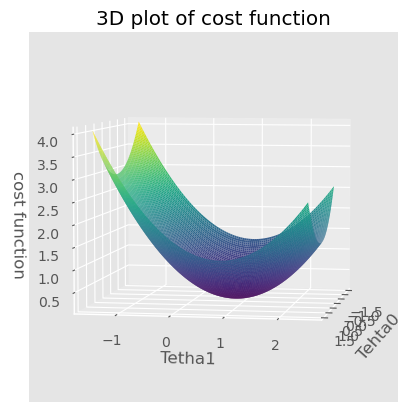

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Tetha0_axis, Tetha1_axis, cost_func, rstride=1, cstride=1, cmap='viridis', edgecolor='none')#, cmap='binary')
ax.set_xlabel('Tehta0')
ax.set_ylabel('Tetha1')
ax.set_zlabel('cost function')
ax.set_title('3D plot of cost function')
ax.view_init(5, 10)
plt.show()

---

in the next part of the first phase, we will create a linear regressor using sklearn module, and fit/train it on the training dataset. 

In [14]:
from sklearn import linear_model

sk_reg = linear_model.LinearRegression()
sk_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In the following cell, we created a scatter plot of both train and test datapoints and the corresponding predicted datapoint for each test datapoint. 

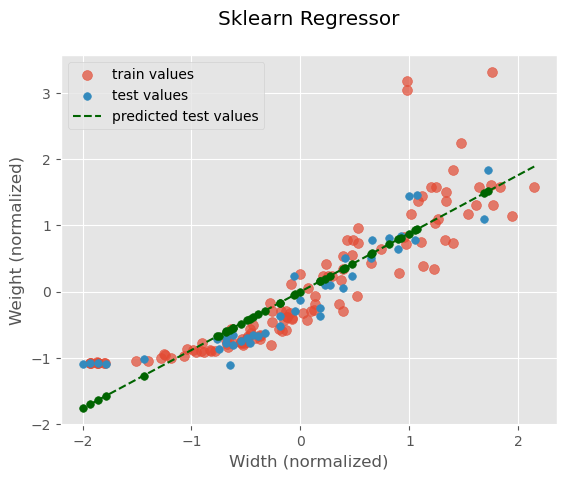

In [87]:
plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=1, s=30)
plt.scatter(X_test_scaled, sk_reg.predict(X_test_scaled), color='darkgreen', s=30)
plt.plot([X_train_scaled.min(), X_train_scaled.max()], [sk_reg.predict(X_train_scaled.min().reshape(1, -1))[0][0], 
                                                        sk_reg.predict(X_train_scaled.max().reshape(1, -1))[0][0]], 
                                                        color='darkgreen', linestyle='--', label='predicted test values')
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('Sklearn Regressor\n')
plt.legend()
plt.show()

in order to compare the **from scratch** version to the **sklearn** version, `cost_calculator` is definded to calculate the cost for each model (based on **mean squared error**).

In [16]:
def cost_calculator(y, predicted):
    return (1 / (2*len(y))) * ((predicted - y)**2).sum()

In [17]:
cost1 = cost_calculator(y_test_scaled, ln_reg.hypothesis(X_test_scaled))
cost2 = cost_calculator(y_test_scaled, sk_reg.predict(X_test_scaled))

print('\n-------------------------------------------------------------------------------------------------')
print('final cost of the from scratch version on test dataset :', cost1)
print('-------------------------------------------------------------------------------------------------')
print('final cost of the scikit-learn linear regression model on test dataset :', cost2)
print('-------------------------------------------------------------------------------------------------\n')



-------------------------------------------------------------------------------------------------
final cost of the from scratch version on test dataset : 0.05450041523341238
-------------------------------------------------------------------------------------------------
final cost of the scikit-learn linear regression model on test dataset : 0.05429954852945427
-------------------------------------------------------------------------------------------------



---
---


## Second phase:

---
---

In the following cell, there is a class called `ploynomial_regressor` which provides us the "from-scratch" version of the **polynomial regression** model.

### Hypothesis representation
If we consider the relationship between the `Width` and `Weight` as a curved line, we consider the hypothesis as a function that represents an equation of the second degree. $$ h_\theta = \theta_0 + \theta_1x_i + \theta_2x_i^2\qquad i = 1,2,...,m \qquad \text{m is the number of samples}$$

This example is a ploynomial regression, therefore there is three paramters to determine the shape of the fitting curve: $\theta_0$, $\theta_1$, and $\theta_2$.
At the time of instantiation, three random values are assigned to the $\theta_0$, $\theta_1$, and $\theta_2$.



### Cost function
For evaluating our model performance, we need to define a cost function, which it's value expresses how bad our model is predicting the target/dependent variable. there are different cost functions for polynomial regression, in this implementation, we are using **mean squared error** as our cost function. this function calculates the cost as follows: $$ J(\theta)=\dfrac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)^2 $$

**Note**: here we multiplied the **mean squared error** function by $\dfrac{1}{2}$ in order to simplify the derivative of the cost fucntion.

the `cost_fucntion` method in the following class, is implemented in a way that supports both cases of giving a single training example, or multiple training examples, as input.



### Update method
In the update method, gradient descent is used to update the $\theta_0$, $\theta_1$, and $\theta_2$ parameters of the polynomial regression model. there are three parameters in this case, so we need to calculate the derivative of the cost function, relative to all $\theta_0$, $\theta_1$, and $\theta_2$ parameters.
$$\dfrac{∂}{∂\theta_0}J(\theta_0, \theta_1, \theta_2)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})$$
$$\dfrac{∂}{∂\theta_1}J(\theta_0, \theta_1, \theta_2)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}).x^{(i)}$$
$$\dfrac{∂}{∂\theta_2}J(\theta_0, \theta_1, \theta_2)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}).(x^{(i)})^2$$

then, the calculated gradients are multiplied by $\alpha$ (alpha) and then subtracted by the previous values of $\theta_0$, $\theta_1$, and $\theta_2$, then the resulting value will assign to the $\theta_0$, $\theta_1$, and $\theta_2$ parameters respectively. 

**Note**: here we are using full batch gradient descent, which that means in each update, we are using the whole dataset to estimate how badly our model is performing.

In [18]:
class polynomial_regressor:
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta0, self.theta1, self.theta2 = self.initializer()
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(3)

    def hypothesis(self, x):
        res = self.theta0 + self.theta1 * x + self.theta2 * (x**2)
        return res
    
    def loss_function(self, x, y):
        if type(x) == float :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2)
        else :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
            
    def update(self, x, y):
        delta_theta0 = (self.hypothesis(x) - y).sum() * (1/len(x))
        delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * (1/len(x))
        delta_theta2 = ((self.hypothesis(x) - y) * (x**2)).sum() * (1/len(x))

        self.theta0 = self.theta0 - self.alpha * delta_theta0
        self.theta1 = self.theta1 - self.alpha * delta_theta1
        self.theta2 = self.theta2 - self.alpha * delta_theta2

By using the `matplotlib` library, we are going to plot both training and testing datasets, which are the same as the first phase. 

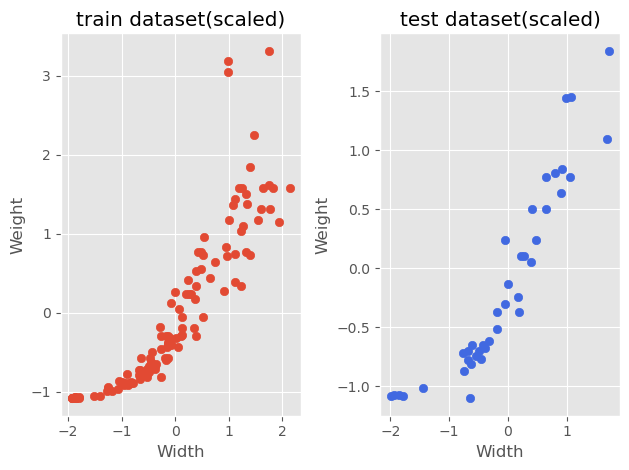

In [74]:
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled, y_train_scaled)
plt.title('train dataset(scaled)')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled, y_test_scaled, color='royalblue')
plt.title('test dataset(scaled)')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

Then, the training phase will begin, first of all, we will instantiate a new instance of the `polynomial_regressor` class defined before, with a specific value for the alpha parameter. In the next step, to make an animation of the training procedure, we defined an `animate3` function that acts as a frame creator for our animation, in each execution of this function, we are calculating the value of the loss function on both train and test datasets, then plotting the dataset and the fitting line using the `matplotlib`, and finally, update the instance of `polynomial_regressor` class using `update` method in each iteration.   

In [93]:
line = np.linspace(-2, 2.2, 100)

poly_reg = polynomial_regressor(0.09)
fig3, ax3 = plt.subplots()

train_loss = []
test_loss = []

def animate3(i):
    train_loss.append(poly_reg.loss_function(X_train_scaled, y_train_scaled))
    test_loss.append(poly_reg.loss_function(X_test_scaled, y_test_scaled))
    ax3.cla()
    ax3.scatter(X_train_scaled, y_train_scaled, label='training points', alpha=0.7)
    ax3.scatter(X_train_scaled, poly_reg.hypothesis(X_train_scaled), color='darkgreen', alpha=0.7, s=20, label='predicted training points')
    ax3.plot(line, poly_reg.hypothesis(line), color='darkgreen', alpha=0.7, label='fitting curve')
    poly_reg.update(X_train_scaled, y_train_scaled)
    ax3.set_xlabel('Width (normalized)')
    ax3.set_ylabel('Weight (normalized)')
    ax3.set_title('fitting on train data')
    ax3.legend()


ani3 = FuncAnimation(fig3, animate3, frames=100, interval=100)
plt.close()

using `HTML` function, we have a video in output which shows how our curved line fits on the dataset, step by step.

In [94]:
HTML(ani3.to_html5_video())

The next plot will show the behavior of the cost function on both training and testing datasets, during the training phase.

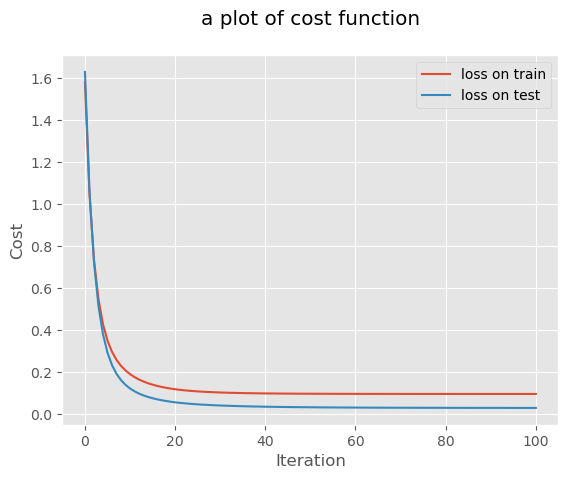

In [23]:
plt.plot(list(range(len(train_loss))), train_loss, label='loss on train')
plt.plot(list(range(len(test_loss))), test_loss, label='loss on test')
plt.legend()
plt.title('a plot of cost function\n')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

The next step is to create a 3D plot of the cost function on the values of `Tetha1`, and `Tetha2` parameters. to fulfill this purpose, in the following cell, we will first create the three needed grids for the plot. two of the grids will represent the values of `Tetha1` and `Tetha2` (**NOTE**: we can only consider two out of the three parameters cause otherwise, our plot will be a four-dimensional plot which is impossible to draw) and third grid will represent the values of the cost function corresponding to each combination of `Tetha1` and `Tetha2` values.

In [38]:
def f(x, y, t1, t2):
    res = np.zeros_like(t1)
    for i in range(len(x)):
        h = (x[i][0]**2) * t2 + x[i][0] * t1 
        res = res + (1/2 * (h - y[i])**2)
    res = res / len(x)
    return res

tetha2_axis = np.linspace(-1.5, 1.5, 100)
Tetha1_axis, Tetha2_axis = np.meshgrid(theta1_axis, tetha2_axis)

cost_func2 = f(X_train_scaled, y_train_scaled, Tetha1_axis, Tetha2_axis)

The following cell will use the matplotlib library to display the desired 3D plot of the cost function.

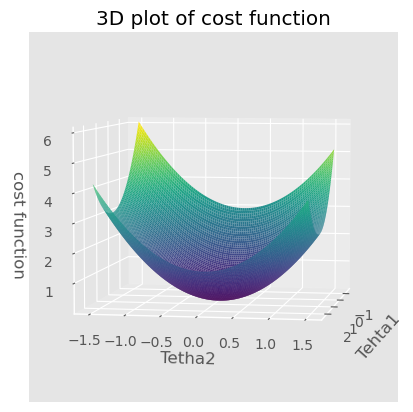

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Tetha1_axis, Tetha2_axis, cost_func2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')#, cmap='binary')
ax.set_xlabel('Tehta1')
ax.set_ylabel('Tetha2')
ax.set_zlabel('cost function')
ax.set_title('3D plot of cost function')
ax.view_init(5, 10)
plt.show()

---

in the next part of the first phase, we will create a polynomial regressor using sklearn module, and fit/train it on the training dataset. 

In the following, in order to turn `sklearn` linear regression into a ploynomial regression, we add a new column to the both training and testing data, which this new column, contains the values of the first column to the power of two.

In [43]:
XX_train_scaled = np.concatenate([X_train_scaled, X_train_scaled ** 2], axis=1)
XX_test_scaled = np.concatenate([X_test_scaled, X_test_scaled ** 2], axis=1)
print(XX_train_scaled[:5]) 
sklearn_poly_reg = linear_model.LinearRegression()
sklearn_poly_reg.fit(XX_train_scaled, y_train_scaled)

[[-0.28397898  0.08064406]
 [ 0.39278689  0.15428154]
 [ 0.38829572  0.15077357]
 [ 0.06569019  0.0043152 ]
 [-0.41381443  0.17124238]]


LinearRegression()

In the following cell, we created a scatter plot of both train and test datapoints and the corresponding predicted datapoint for each test datapoint.

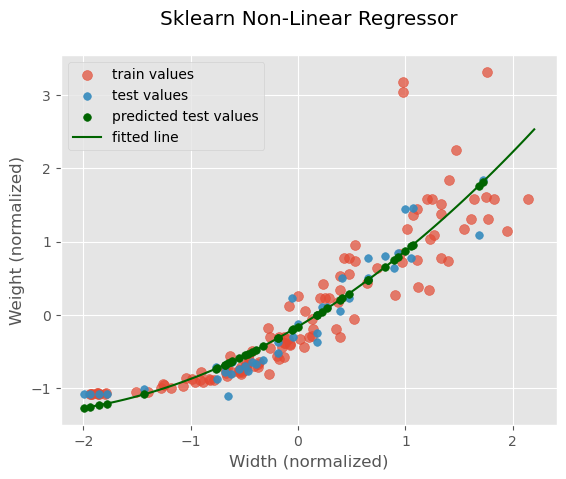

In [89]:
curve_line = np.array([line, line**2]).T

plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=0.9, s=30)
plt.scatter(X_test_scaled, sklearn_poly_reg.predict(XX_test_scaled), color='darkgreen', s=30, label='predicted test values')
# plt.scatter(X_train_scaled, sklearn_non_reg.predict(XX_train_scaled), color='black', alpha=1, s = 2)
plt.plot(line, sklearn_poly_reg.predict(curve_line), label='fitted line', color='darkgreen')
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('Sklearn Non-Linear Regressor\n')
plt.legend()
plt.show()

finally, to compare the performance of each of the two versions, we will use the predefined cost_calculator function (which as defined before, uses mean squared error) and calculate the loss of each model on the test dataset. 

In [90]:
cost1 = cost_calculator(y_test_scaled, poly_reg.hypothesis(X_test_scaled))
cost2 = cost_calculator(y_test_scaled, sklearn_poly_reg.predict(XX_test_scaled))

print('\n-------------------------------------------------------------------------------------------------')
print('final cost of the from scratch version on test dataset :', cost1)
print('-------------------------------------------------------------------------------------------------')
print('final cost of the scikit-learn linear regression model on test dataset :', cost2)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final cost of the from scratch version on test dataset : 0.02914018422710002
-------------------------------------------------------------------------------------------------
final cost of the scikit-learn linear regression model on test dataset : 0.028871206592044847
-------------------------------------------------------------------------------------------------

